In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/diabetes/diabetic_data.csv
/kaggle/input/diabetes/description.pdf


In [2]:
df=pd.read_csv('/kaggle/input/diabetes/diabetic_data.csv')

**Importing necessary packages**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')


**Data Exploration**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


**Generating output variable**

In [6]:
#we need to check whether a patient admitted within 30 days or not
df['target']=(df['readmitted']=='<30').astype('int')

#dropping readmitted column
df.drop(['readmitted'],axis=1,inplace=True)

**Target variable**

Text(0.5, 1.0, 'Target variable count')

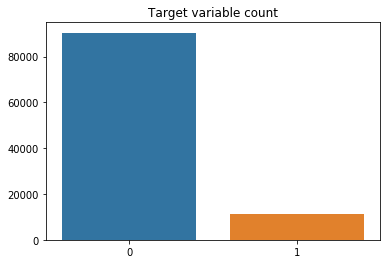

In [7]:
x=df['target'].value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

* **There is clearly a class imbalace problem.**

In [8]:
Count_Target_0 = len(df[df["target"]==0])
Count_Target_1 = len(df[df["target"]==1])

Percentage_of_Target_0 = Count_Target_0/(Count_Target_0+Count_Target_1)
print("percentage of Target 0 is",Percentage_of_Target_0*100)

Percentage_of_Target_1= Count_Target_1/(Count_Target_0+Count_Target_1)
print("percentage of Target 1 is",Percentage_of_Target_1*100)

percentage of Target 0 is 88.84008411453728
percentage of Target 1 is 11.159915885462727


**Hence in data there is only 11 % are the readmitted patients,now we have to do resampling of this data **

**Resampling**

**Before re sampling lets have look at the different accuracy matrices:**

* TP = True possitive means no of possitve cases which are predicted possitive

* TN = True negative means no of negative cases which are predicted negative

* FP = False possitve means no of negative cases which are predicted possitive

* FN= False Negative means no of possitive cases which are predicted negative

**Confusion Matrix: a table showing correct predictions and types of incorrect predictions.**

**Precision(TP/(TP+FP))** : The number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.

**Recall(TP/(TP+FN))**: The number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.

**Resampling:**

A widely adopted technique for dealing with highly unbalanced datasets is called resampling

**Undersampling**: It is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.

 **Oversampling**: It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class.
 
 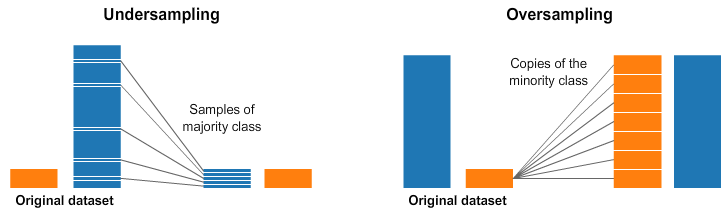

In [9]:
not_readmitted=df[df.target==0]
readmitted=df[df.target==1]

**Oversampling**

In [10]:
#upsample minority
readmitted_upsampled = resample(readmitted,
                          replace=True, # sample with replacement
                          n_samples=len(not_readmitted), # match number in majority class
                          random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([not_readmitted, readmitted_upsampled])

# check new class counts
upsampled.target.value_counts()

1    90409
0    90409
Name: target, dtype: int64

Text(0, 0.5, 'count')

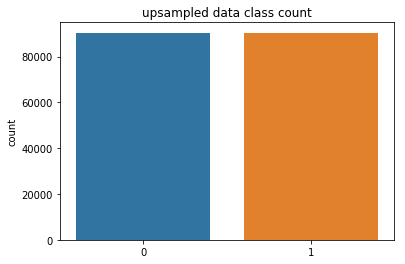

In [11]:
y=upsampled.target.value_counts()
sns.barplot(y=y,x=[0,1])
plt.title('upsampled data class count')
plt.ylabel('count')

**After upsampling the dataset,Plot shows an equal number of classes.**

**Undersampling**

In [12]:
not_readmitted_downsampled = resample(not_readmitted,
                                replace = False, # sample without replacement
                                n_samples = len(readmitted), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_readmitted_downsampled, readmitted])

# checking counts
downsampled.target.value_counts()

1    11357
0    11357
Name: target, dtype: int64

Text(0, 0.5, 'count')

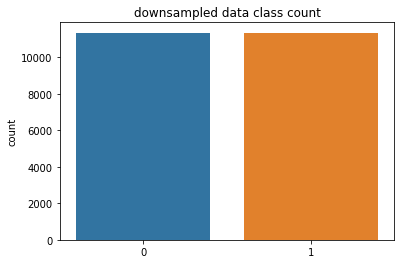

In [13]:
y=downsampled.target.value_counts()
sns.barplot(y=y,x=[0,1])
plt.title('downsampled data class count')
plt.ylabel('count')

**Note :** If your dataset has large number of records and you dont worry about data loss do undersampling.In other hand, if you concerned about data loss then do oversampling.